<a href="https://colab.research.google.com/github/deltorobarba/quantum/blob/main/superdense.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color="blue">**Superdense Coding (Bell State)**

![sciences](https://raw.githubusercontent.com/deltorobarba/repo/master/sciences_0000.png)


***Superdense Coding (Bell State): 1 Qubit - Tensor Product of two Parallel Gates (Superposition in Multiple Qubits)***

In [ ]:
# Create Vanilla Qubits
# Named Qubit
a = cirq.NamedQubit("a")
b = cirq.NamedQubit("b")

#Line-Qubit
qubits = cirq.LineQubit.range(2)

The tensor product (or Kronecker product) of two quantum gates is the gate that is equal to the two gates in parallel.

In [ ]:
# Define operations
ops=[cirq.Y(a), # Superposition
     cirq.X(b), # Entanglement
     cirq.measure(a,b)] # Measurement

# Build circuit
circuit=cirq.Circuit(ops)

print(circuit)

a: ───Y───M───
          │
b: ───X───M───


*Two gates $Y$ and $X$ in parallel is equivalent to the gate $Y\otimes X$*

![ggg](https://upload.wikimedia.org/wikipedia/commons/d/d5/Parallel_quantum_logic_gates.png)

If we, as in the picture, combine the Pauli-Y gate with the Pauli-X gate in parallel, then this can be written as:

> $C=Y \otimes X=\left[\begin{array}{cc}0 & -i \\ i & 0\end{array}\right] \otimes\left[\begin{array}{ll}0 & 1 \\ 1 & 0\end{array}\right]=\left[\begin{array}{ll}0\left[\begin{array}{ll}0 & 1 \\ 1 & 0\end{array}\right] & -i\left[\begin{array}{ll}0 & 1 \\ 1 & 0\end{array}\right] \\ i\left[\begin{array}{ll}0 & 1 \\ 1 & 0\end{array}\right] & 0\left[\begin{array}{ll}0 & 1 \\ 1 & 0\end{array}\right]\end{array}\right]=\left[\begin{array}{cccc}0 & 0 & 0 & -i \\ 0 & 0 & -i & 0 \\ 0 & i & 0 & 0 \\ i & 0 & 0 & 0\end{array}\right]$

Both the Pauli-X and the Pauli-Y gate act on a single qubit. The resulting gate $C$ act on two qubits.

In [ ]:
# Run Simulations & Measurements
simulator = cirq.Simulator()
result = simulator.run(circuit,repetitions=10)
print('Measurement results')
print(result)

Measurement results
a,b=1111111111, 1111111111


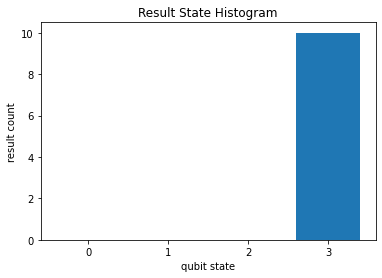

In [ ]:
# Visualization
# After doing that, you should see the quantum state become ∣00⟩+∣11⟩
_ = cirq.vis.plot_state_histogram(result) #, plt.subplot())

In [ ]:
result.histogram(key="a,b")

Counter({3: 10})

***Superdense Coding (Bell State): 2 Qubits - CNOT Gate (CX) [and Controlled-U Gate]: Create Bell state (Superposition across Multiple Qubits)***

> CNOT, acting on a two-qubit term $\left|q_{1} q_{2}\right\rangle$, applies the $\mathbf{N O T}(\mathbf{X})$ gate to the second qubit only if the first qubit is in state $|1\rangle$. The first qubit controls the action on the second.

> 0 im Output wenn zwei Inputs gleich sind. 1 im Output wenn die Inputs unterschiedlich sind.

*Entanglement*

In [ ]:
cirq.unitary(cirq.CNOT)

array([[1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j],
       [0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j]])

The [Controlled NOT gate](https://en.m.wikipedia.org/wiki/Controlled_NOT_gate) (also C-NOT or CNOT, controlled Pauli-X) is a quantum logic gate that is an essential component in the construction of a gate-based quantum computer. **It can be used to entangle and disentangle Bell states**. Any quantum circuit can be simulated to an arbitrary degree of accuracy using a combination of CNOT gates and single qubit rotations.

>$
\begin{array}{|c|c|c|c|}
\hline {\text { Before }} & {\text { Before }}& {\text { After }}& {\text { After }} \\
\hline \text { Control } & \text { Target } & \text { Control } & \text { Target } \\
\hline|0\rangle & |0\rangle & |0\rangle & |0\rangle \\
\hline|0\rangle & |1\rangle & |0\rangle & |1\rangle \\
\hline|1\rangle & |0\rangle & |1\rangle & |1\rangle \\
\hline|1\rangle & |1\rangle & |1\rangle & |0\rangle \\
\hline
\end{array}
$

A common application of the $\mathrm{C}_{\text {NOT }}$ gate is to maximally entangle two qubits into the $\left|\Phi^{+}\right\rangle$ Bell state; this forms part of the setup of the superdense coding, quantum teleportation, and entangled quantum cryptography algorithms.

CNOT or controlled Pauli-X.

* **Verschrankt zwei Qubits und invertiert das Ziel-Qubit**, wenn das Kontroll-Qubit 1 ist:

> $|00\rangle \rightarrow|00\rangle$

> $|01\rangle \rightarrow|01\rangle$

> $|10\rangle \rightarrow|11\rangle$

> $|11\rangle \rightarrow|10\rangle$

Matrix-Darstellung:

> $\left(\begin{array}{llll}1 & 0 & 0 & 0 \\ 0 & 1 & 0 & 0 \\ 0 & 0 & 0 & 1 \\ 0 & 0 & 1 & 0\end{array}\right)$

The CNOT (or controlled Pauli- $X$ ) gate can be described as the gate that maps the basis states $|a, b\rangle \mapsto|a, a \oplus b\rangle$, where $\oplus$ is XOR.

**Controlled-U Gate**

More generally if $U$ is a gate that operates on single qubits with matrix representation

>$
U=\left[\begin{array}{ll}
u_{00} & u_{01} \\
u_{10} & u_{11}
\end{array}\right]
$

then the controlled-U gate is a gate that operates on two qubits in such a way that the first qubit serves as a control.

It maps the basis states as follows:

$|00\rangle \mapsto|00\rangle$

$|01\rangle \mapsto|01\rangle$

$|10\rangle \mapsto|1\rangle \otimes U|0\rangle=|1\rangle \otimes\left(u_{00}|0\rangle+u_{10}|1\rangle\right)$

$|11\rangle \mapsto|1\rangle \otimes U|1\rangle=|1\rangle \otimes\left(u_{01}|0\rangle+u_{11}|1\rangle\right)$

The matrix representing the controlled $U$ is

>$
\mathrm{C} U=\left[\begin{array}{cccc}
1 & 0 & 0 & 0 \\
0 & 1 & 0 & 0 \\
0 & 0 & u_{00} & u_{01} \\
0 & 0 & u_{10} & u_{11}
\end{array}\right]
$

**When U is one of the Pauli operators, X,Y, Z, the respective terms "controlled-X", "controlled-Y", or "controlled-Z" are sometimes used**.
Sometimes this is shortened to just CX, CY and CZ.

**Code example: Create Bell state**

In [ ]:
# Create Vanilla Qubits
# Named Qubit
a = cirq.NamedQubit("a")
b = cirq.NamedQubit("b")

#Line-Qubit
qubits = cirq.LineQubit.range(2)

In [ ]:
# Define operations
ops=[cirq.H(a), # Superposition
     cirq.CNOT(a,b), # Entanglement
     cirq.H(a),
     cirq.measure(a,b)] # Measurement

# Build circuit
circuit=cirq.Circuit(ops)

print(circuit)

a: ───H───@───H───M───
          │       │
b: ───────X───────M───


*More about creating Bell state from superposition & entanglement: [Demystifying Superdense Coding](https://medium.com/qiskit/demystifying-superdense-coding-41d46401910e)*

In [ ]:
# Run Simulations & Measurements
simulator = cirq.Simulator()
result = simulator.run(circuit,repetitions=100)
print('Measurement results')
print(result)

Measurement results
a,b=1110010101010110111100101011011111100100110101101101110000110001010000101011100100111110000001011001, 1100000001000011000100101011011000110101101001100111111001101000001100010010100010100100001010100000


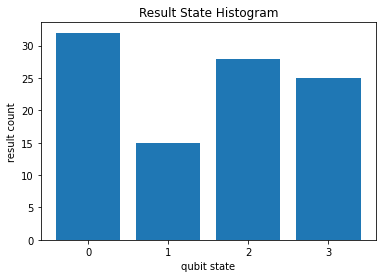

In [ ]:
# Visualization
# After doing that, you should see the quantum state become ∣00⟩+∣11⟩
_ = cirq.vis.plot_state_histogram(result) #, plt.subplot())
# https://quantumai.google/cirq/tutorials/state_histograms

In [ ]:
result.histogram(key="a,b")

Counter({0: 32, 1: 15, 2: 28, 3: 25})

**Make Bell state operations reverse**

In [ ]:
# Create Vanilla Qubits
# Named Qubit
a = cirq.NamedQubit("a")
b = cirq.NamedQubit("b")

#Line-Qubit
qubits = cirq.LineQubit.range(2)

*Operators are unitary*

In [ ]:
# Define operations
ops=[cirq.H(a), # Superposition
     cirq.CNOT(a,b), # Entanglement
     cirq.CNOT(a,b),
     cirq.H(a),
     cirq.measure(a,b)] # Measurement

# Build circuit
circuit=cirq.Circuit(ops)

print(circuit)

a: ───H───@───@───H───M───
          │   │       │
b: ───────X───X───────M───


In [ ]:
# Run Simulations & Measurements
# Outcome should be same as step 1: 0, back to as if nothing happened
simulator = cirq.Simulator()
result = simulator.run(circuit,repetitions=100)
print('Measurement results')
print(result)

Measurement results
a,b=0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000, 0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000


In [ ]:
result.histogram(key="a,b")

Counter({0: 100})

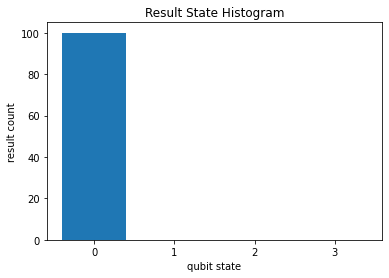

In [ ]:
# Visualization
# After doing that, you should see the quantum state become ∣00⟩+∣11⟩
_ = cirq.vis.plot_state_histogram(result) #, plt.subplot())
# https://quantumai.google/cirq/tutorials/state_histograms

**Multiple Qubits: Product State vs Entangled State (Bell State)**

* As the name implies, entanglement is a property of quantum mechanical systems that only reveals itself when states begin to interact.

* When two qubits are brought together and we'd like to consider the new joint system that they form, we use a fancy new symbol: ⊗. This is called the tensor product, but really it just represents a combination of two or more quantum states.

**Product States**
* States which can be described as a tensor product of two independent superpositions are known as product states.

A joint state of two initialized qubits can be represented as

>$|0\rangle\otimes|0\rangle$

If we apply the Hadamard gate to the first qubit, it transforms but leaves the other qubit unaffected, since the Hadamard is a single qubit gate:

>$
\mathbf{H}|0\rangle \otimes|0\rangle=\left(\frac{1}{\sqrt{2}}|0\rangle+\frac{1}{\sqrt{2}}|1\rangle\right) \otimes|0\rangle
$

**Exkurs**: wenn ein Gate bei einem Single Qubit mehr Probability als 0,5 hat, kann man das so schreiben (Achtung: Koeffizient ist Wurzel aus Probability),

> $\mathbf{H}|0\rangle\ = (0,9) * |0\rangle + (0,1) * |1\rangle$

* 0,71 ist für 50% Probability (man muss es squared nehmen!)

* 0,9 ist für 0,99 Probability

* 1 ist für 100% Probability für State 0, der andere Term hat dann 0 % und verschwindet. Es bleibt dann nur noch $|0\rangle$

The tensor product is distributive, which in this case means it acts much like multiplication:

>$
\mathbf{H}|0\rangle \otimes|0\rangle=\frac{1}{\sqrt{2}}|0\rangle \otimes|0\rangle+\frac{1}{\sqrt{2}}|1\rangle \otimes|0\rangle \text {. }
$

Using a series of single-qubit gates, we can transform two initialized qubits into two new arbitrary states:

>$
\begin{array}{l}
\text { Qubit 1: } \quad|0\rangle \rightarrow a_{1}|0\rangle+a_{2}|1\rangle \\
\text { Qubit 2: } \quad|0\rangle \rightarrow b_{1}|0\rangle+b_{2}|1\rangle .
\end{array}
$

The resulting 2 -qubit state is usually written as their product using a fancy new symbol:

>$|0\rangle
\otimes|0\rangle \rightarrow\left(a_{1}|0\rangle+a_{2}|1\rangle\right) \otimes\left(b_{1}|0\rangle+b_{2}|1\rangle\right)
$

Another way to express this would be:

> $a_{1} b_{1}|0\rangle \otimes|0\rangle+a_{1} b_{2}|0\rangle \otimes|1\rangle+a_{2} b_{1}|1\rangle \otimes|0\rangle+a_{2} b_{2}|1\rangle \otimes|1\rangle$

**Bell state (Entangled State)**

* To simplify notations, we sometimes omit the $\otimes$ sign and only **write $|00\rangle$ to denote that both the first qubit and the second qubit are in the $|0\rangle$ state**.

* There are four total 2 -qubit combinations, including $|01\rangle=|0\rangle \otimes|1\rangle$, and so on.

With this simplified notation, a general 2 -qubit joint state can be written as an arbitrary linear combination of four 2 -qubit computational states:

>$
a|00\rangle+b|01\rangle+c|10\rangle+d|11\rangle
$

This is quite a bit different than the joint state found by preparing both qubits into independent single-qubit superpositions:

>$
\left(a_{1}|0\rangle+a_{2}|1\rangle\right) \otimes\left(b_{1}|0\rangle+b_{2}|1\rangle\right)=a_{1} b_{1}|00\rangle+a_{1} b_{2}|01\rangle+a_{2} b_{1}|10\rangle+
$

* simple and well-known joint state called the Bell state:

> $\frac{1}{\sqrt{2}}|00\rangle+\frac{1}{\sqrt{2}}|11\rangle$

* you can NOT write the Bell state as a product of two single-qubit states

Entangled States
* The Bell state is the prototypical example of an entangled state.
* Two qubits which are entangled can never be separated into two independent states: their coefficients are a tangled-up mess:

> $|\psi\rangle_{\text {Bell }}=\frac{1}{\sqrt{2}}(|00\rangle+|11\rangle)$

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/quantum_036.jpg)

* We can contrast this with n-qubit product states, where the state of every qubit is known and they have only 2n independent amplitudes. This is a vast difference!

* This means that most of the n-qubit space is populated by entangled states, ones that can't be written as a simple product of its components.

* We will see in a bit that with only two parameterized gates, we could transform an initialized qubit into any possible single qubit state on the surface of the Bloch sphere:

> $\mathcal{R}_{\phi} \mathcal{R}_{\theta}|0\rangle=a_{1}|0\rangle+a_{2}|1\rangle$

**How to get to an Entanglement Circuit?**

To start, we can prepare two qubits in the $|0\rangle$ state. At this point there's no connection between them, and we can write them in the product state $|\psi\rangle=$
$|0\rangle \otimes|0\rangle$ which is the same as $|00\rangle$.

Comparing $|\psi\rangle$ to the Bell state, we see that at some point along the way, we'll need to get into a superposition. Using the set of gates we currently have at our disposal $(\mathbf{X}, \mathbf{Z}, \mathbf{H})$, there doesn't appear to be a single gate that we can apply to take us from $|\psi\rangle$ to $\left|\psi_{\text {Bell }}\right\rangle .$ Naively, it seems that we have two tasks ahead of
us:

1. Getting $|\psi\rangle$ into a superposition.

2. Adjusting the individual kets so that we're in the Bell state.

At the moment we have the Hadamard, which can move one of our qubits into superposition. For argument's sake, let's apply it to the first qubit:
$$
\begin{aligned}
\mathbf{H}_{1}|\psi\rangle &=(\mathbf{H}|0\rangle) \otimes|0\rangle \\
&=\frac{|0\rangle+|1\rangle}{\sqrt{2}} \otimes|0\rangle \\
&=\frac{|00\rangle+|10\rangle}{\sqrt{2}} .
\end{aligned}
$$

Now we need to find gates that allow us to coordinate action on two qubits.

While single qubit gates like $\mathbf{X}$ and $\mathbf{H}$ can't get us all the way to the Bell state, we'd still like to keep our gate set as simple as possible. In this spirit, let's stick with the Hadamard gate to perform our superposition, and look for a multiqubit gate $\mathrm{M}$ that can get us the rest of the way:

> $
\frac{|00\rangle+|10\rangle}{\sqrt{2}} \stackrel{\mathrm{M}}{\longrightarrow} \frac{|00\rangle+|11\rangle}{\sqrt{2}}
$

**Die erste Spalte mit 0 und 1 (links jeweils) zeigt, dass dieses Qubit in einer Superposition ist mit 50% Probability von 0 und 1, während das zweite Qubit (jeweils rechts) 0 und 0 ist, weil es sich nich im initialen Zustand befindet, der immer 100% 0 ist!**

Following behaviors would make for a suitable multi-qubit gate M:

* Flip qubit 2 whenever qubit 1 and qubit 2 are opposite

* Flip qubit 2 if qubit 1 is in state ∣1⟩

* we need to keep the core principle of quantum mechanics — reversibility!

Consider the action of $\mathbf{M}$ on the two-qubit basis states: if a $|11\rangle$ term appears in the quantum state after we apply $\mathrm{M}$, we can't tell if it's because we started with a $|11\rangle$ term, or if it's because we started with a $|10\rangle$ term.

The preferred entangling gate, called CNOT (controlled NOT), gets us into the Bell state while respecting the reversibility condition:
$$
\begin{array}{l}
|00\rangle \stackrel{\text { CNOT }}{\longrightarrow}|00\rangle \\
|01\rangle \stackrel{\text { CNOT }}{\longrightarrow}|01\rangle \\
|10\rangle \stackrel{\text { CNOT }}{\longrightarrow}|11\rangle \\
|11\rangle \stackrel{\text { CNOT }}{\longrightarrow}|10\rangle .
\end{array}
$$

> CNOT, acting on a two-qubit term $\left|q_{1} q_{2}\right\rangle$, applies the $\mathbf{N O T}(\mathbf{X})$ gate to the second qubit only if the first qubit is in state $|1\rangle$. The first qubit controls the action on the second.

This enables us to prepare the entangled Bell state and is a subroutine

> $\frac{|10\rangle+|00\rangle}{\sqrt{2}} \stackrel{\text { CNOT }}{\longrightarrow} \frac{|11\rangle+|00\rangle}{\sqrt{2}}$

**For Quantum Cryptography**

* But Alice and Bob aren't stuck with the computational basis: **the Bell state is entangled no matter what basis we use to analyze it**. This is particularly easy to see by switching to the Hadamard basis.

* As we showed before, the Bell state has the same form in the computational basis as it does in the Hadamard basis:

> $\left|\psi_{\text {Bell }}\right\rangle=\frac{|00\rangle+|11\rangle}{\sqrt{2}}=\frac{|--\rangle+|++\rangle}{\sqrt{2}}$

* So, Alice and Bob are free to use either basis to coordinate their bits.

*If Alice measures her qubit using the Hadamard basis, what are the possibilities for Bob's measurement in the computational basis?*

![gg](https://raw.githubusercontent.com/deltorobarba/repo/master/quantum_037.jpg)

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/quantum_038.jpg)

**CNOT Gate and Entanglement**

Quantum states $|\psi\rangle$ aren't always one of the computational basis states.

In general, they can also be (ignoring normalization factors)

>$
|+\rangle=|0\rangle+|1\rangle
$

or

>$
|-\rangle=|0\rangle-|1\rangle \text {. }
$

*What does the CNOT gate do with these input states?*

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/quantum_039.jpg)

***Superdense Coding (Bell State): 2 Qubits - H, CNOT & X-Gate: Superdense Coding for Quantum Communication***

Superdense Coding is a method to transmit two classical bits of information by sending only one qubit of information. This is accomplished by pre-sharing an entangled state between the sender and the receiver. This entangled state allows the receiver of the one qubit of information to decode the two classical bits that were originally encoded by the sender.

*Complete example from Cirq*

In [ ]:
def make_superdense_circuit():
    circuit = cirq.Circuit()
    q0, q1, q2, q3, q4 = cirq.LineQubit.range(5)

    # Randomly sets q0 and q1 to either 0 or 1
    circuit.append([cirq.H(q0), cirq.H(q1)])
    circuit.append(cirq.measure(q0, q1, key="input "))

    # Creates Bell State to be shared on q2 and q4
    circuit.append([cirq.H(q2), cirq.CNOT(q2, q4)])
    # Step 1 of encoding (controlled NOT gate on q1 / q2)
    circuit.append(cirq.CNOT(q1, q2))
    # Step 2 of encoding (controlled Z gate on q0 / q2)
    circuit.append(cirq.CZ(q0, q2))
    # Sends encoded information to receiver
    circuit.append(cirq.SWAP(q2, q3))
    # Step 1 of decoding (controlled NOT gate on q3 and q4)
    circuit.append(cirq.CNOT(q3, q4))
    # Step 2 of decoding (Hadamard gate on q3)
    circuit.append(cirq.H(q3))
    # Measurement by receiver to decode bits
    circuit.append(cirq.measure(q3, q4, key="output"))

    return circuit


def main():
    circuit = make_superdense_circuit()
    print("Circuit:")
    print(circuit)

    sim = cirq.Simulator()
    results = sim.run(circuit, repetitions=20)
    print("\nResults:")
    print(results)


if __name__ == '__main__':
    main()

NameError: name 'cirq' is not defined

*Step by Step Walkthrough*

In [ ]:
# Create Vanilla Qubits
# Named Qubit
a = cirq.NamedQubit("a")
b = cirq.NamedQubit("b")

#Line-Qubit
qubits = cirq.LineQubit.range(2)

NameError: name 'cirq' is not defined

https://medium.com/qiskit/demystifying-superdense-coding-41d46401910e

*Now adding Pauli X gate to alter outcome*

In [ ]:
# Define operations
ops=[cirq.H(a), # Superposition
     cirq.CNOT(a,b), # Entanglement
     cirq.X(a), # Pauli X gate -> changes outcome from 00 to 01
     cirq.CNOT(a,b),
     cirq.H(a),
     cirq.measure(a,b)] # Measurement

# Build circuit
circuit=cirq.Circuit(ops)

print(circuit)

In [ ]:
simulator = cirq.Simulator()
result = simulator.run(circuit,repetitions=100)
print('Measurement results')
print(result)

In [ ]:
# Visualization
# After doing that, you should see the quantum state become ∣00⟩+∣11⟩
_ = cirq.vis.plot_state_histogram(result) #, plt.subplot())
# https://quantumai.google/cirq/tutorials/state_histograms

In [ ]:
result.histogram(key="a,b")